<a href="https://colab.research.google.com/github/JaimeAndresSalas/DynamicOptimization/blob/master/IntroductiontoDynamicModeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install gekko

     |████████████████████████████████| 9.8MB 6.3MB/s 


In [0]:
from gekko import GEKKO
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

 ----------------------------------------------------------------
 APMonitor, Version 0.9.2
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            2
   Variables    :            8
   Intermediates:            0
   Connections  :            0
   Equations    :            7
   Residuals    :            7
 
 Number of state variables:            990
 Number of total equations: -          990
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :              0
 
 solver            3  not supported
 using default solver: APOPT
 ----------------------------------------------
 Dynamic Simulation with APOPT Solver
 ----------------------------------------------
 
 Iter    Objective  Convergence
    0  1.68387E-12  7.84800E+02
    1  1.14271E-14  9.71188E+01
    2  1.4809

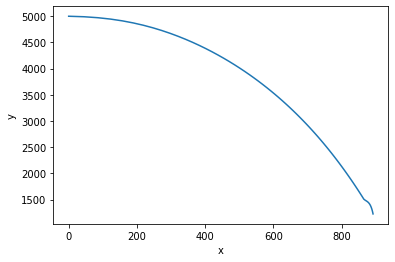

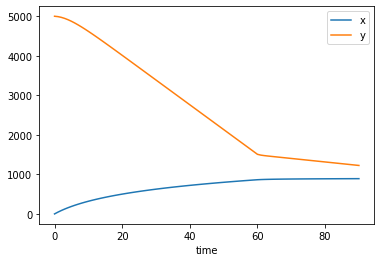

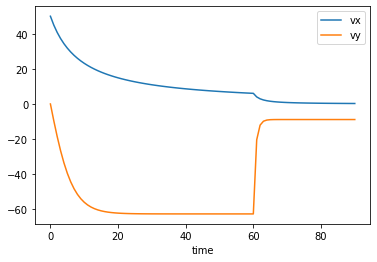

In [10]:
#number of points in time discretization
n = 91

#Initialize Model
m = GEKKO(remote=False)

#define time discretization
m.time = np.linspace(0,90,n)

#make array of drag coefficients, changing at time 60
drag = [(0.2 if t<=60 else 10) for t in m.time]

#define constants
g = m.Const(value=9.81)
mass = m.Const(value=80)

#define drag parameter
d = m.Param(value=drag)

#initialize variables
x,y,vx,vy,v,Fx,Fy = [m.Var(value=0) for i in range(7)]

#initial conditions
y.value = 5000
vx.value = 50

#Equations
# force balance
m.Equation(Fx == -d * vx**2)
m.Equation(Fy == -mass*g + d*vy**2)
#F = ma
m.Equation(Fx/mass == vx.dt())
m.Equation(Fy/mass == vy.dt())
#vel = dxdt
m.Equation(vx == x.dt())
m.Equation(vy == y.dt())
#total velocity
m.Equation(v == (vx**2 + vy**2)**.5)

#Set global options
m.options.IMODE = 4 #dynamic simulation

#Solve simulation
m.solve()

#%% Plot results
plt.figure()
plt.plot(x.value,y.value)
plt.xlabel('x')
plt.ylabel('y')

plt.figure()
plt.plot(m.time,x.value,label='x')
plt.plot(m.time,y.value,label='y')
plt.xlabel('time')
plt.legend()

plt.figure()
plt.plot(m.time,vx.value,label='vx')
plt.plot(m.time,vy.value,label='vy')
plt.xlabel('time')
plt.legend()

plt.show()